- This notebook is to get latent space of amphiphiles dataset by use baseline fingerprints

In [1]:
import sys
sys.path.append("../src/models")
sys.path.append("../src")
sys.path.append("../")

In [2]:
import pandas as pd
import numpy as np

In [3]:
from utils import *
from baseline import *

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
file_path='../../data/df_input_update_ori_20240812.csv'
df_input_update_ori = pd.read_csv(file_path) 
df_input = df_input_update_ori.copy()
df_input.iloc[:,0:7] = df_input.iloc[:,0:7].applymap(lambda x: np.log1p(x))
df_input=df_input.iloc[:, 0:8]
df_input

/var/folders/wn/w203521n4h18b4_rz5rd9tw80000gp/T/ipykernel_71164/3858243564.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_input.iloc[:,0:7] = df_input.iloc[:,0:7].applymap(lambda x: np.log1p(x))


,decanoic acid_Concentration (mM),decanoate_Concentration (mM),decylamine_Concentration (mM),decyl trimethylamine_Concentration (mM),decylsulfate_Concentration (mM),decanol_Concentration (mM),monocaprin_Concentration (mM),num_vesicles
0,0.615186,0.955511,1.231101,1.552868,1.677097,0.441476,0.579418,22
1,1.487270,0.644482,0.175633,1.056053,1.216395,0.207827,0.107059,9
2,1.163151,0.705570,1.294727,1.787584,1.658228,0.159138,0.202941,6
3,1.531476,1.787584,0.381855,0.071390,1.475907,0.589175,0.113329,2
4,1.170933,1.441019,1.677097,0.885832,1.011601,0.750236,0.300105,36
...,...,...,...,...,...,...,...,...
331,0.112435,0.107957,0.009950,0.639219,1.020651,0.000000,0.007968,0
332,0.019803,0.006976,0.064851,0.916291,0.821980,0.033918,0.045929,59
333,0.137150,0.076961,0.043059,0.548121,1.090244,0.013410,0.018822,2
334,0.013903,0.028587,0.092579,0.693147,0.974560,0.049742,0.036332,15


In [13]:
info_path = '../../data/Info.csv'
df_info = pd.read_csv(info_path)

df = df_input.copy()
df.columns = [col.replace('_Concentration (mM)', '') for col in df.columns[:-1]] + ['num_vesicles']

column_to_name = {
    'decanoic acid': 'Decanoic acid',
    'decanoate': 'Decanoate',
    'decylamine': 'Decylamine',
    'decyl trimethylamine': 'Decyltrimethyl ammonium bromid',
    'decylsulfate': 'Decyl sodium sulfate',
    'decanol': 'Decanol',
    'monocaprin': 'Glycerol monodecanoate'
}

# Get SMILES mapping from df_info
name_to_smiles = dict(zip(df_info['Name'], df_info['SMILES']))

# Construct new dataframe
new_data = {}

for col in df.columns[:-1]:  # Skip num_vesicles
    chem_name = column_to_name[col]
    smiles = name_to_smiles.get(chem_name, '')
    new_data[f"{col}_SMILES"] = [smiles] * len(df)
    new_data[f"{col}_Concentration"] = df[col]

# Add num_vesicles
new_data['num_vesicles'] = df['num_vesicles']

# Create the final dataframe
df_structured = pd.DataFrame(new_data)

# Rename columns to the desired format
new_column_names = [
    'smi1', 'conc1',
    'smi2', 'conc2',
    'smi3', 'conc3',
    'smi4', 'conc4',
    'smi5', 'conc5',
    'smi6', 'conc6',
    'smi7', 'conc7',
    'vesicles_formation'
]

# Apply the new column names
df_structured.columns = new_column_names
df_structured

,smi1,conc1,smi2,conc2,smi3,conc3,smi4,conc4,smi5,conc5,smi6,conc6,smi7,conc7,vesicles_formation
0,CCCCCCCCCC(=O)O,0.615186,CCCCCCCCCC(=O)[O-],0.955511,CCCCCCCCCCN,1.231101,CCCCCCCCCC[N+](C)(C)C.[Br-],1.552868,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.677097,CCCCCCCCCCO,0.441476,CCCCCCCCCC(=O)OCC(CO)O,0.579418,22
1,CCCCCCCCCC(=O)O,1.487270,CCCCCCCCCC(=O)[O-],0.644482,CCCCCCCCCCN,0.175633,CCCCCCCCCC[N+](C)(C)C.[Br-],1.056053,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.216395,CCCCCCCCCCO,0.207827,CCCCCCCCCC(=O)OCC(CO)O,0.107059,9
2,CCCCCCCCCC(=O)O,1.163151,CCCCCCCCCC(=O)[O-],0.705570,CCCCCCCCCCN,1.294727,CCCCCCCCCC[N+](C)(C)C.[Br-],1.787584,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.658228,CCCCCCCCCCO,0.159138,CCCCCCCCCC(=O)OCC(CO)O,0.202941,6
3,CCCCCCCCCC(=O)O,1.531476,CCCCCCCCCC(=O)[O-],1.787584,CCCCCCCCCCN,0.381855,CCCCCCCCCC[N+](C)(C)C.[Br-],0.071390,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.475907,CCCCCCCCCCO,0.589175,CCCCCCCCCC(=O)OCC(CO)O,0.113329,2
4,CCCCCCCCCC(=O)O,1.170933,CCCCCCCCCC(=O)[O-],1.441019,CCCCCCCCCCN,1.677097,CCCCCCCCCC[N+](C)(C)C.[Br-],0.885832,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.011601,CCCCCCCCCCO,0.750236,CCCCCCCCCC(=O)OCC(CO)O,0.300105,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,CCCCCCCCCC(=O)O,0.112435,CCCCCCCCCC(=O)[O-],0.107957,CCCCCCCCCCN,0.009950,CCCCCCCCCC[N+](C)(C)C.[Br-],0.639219,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.020651,CCCCCCCCCCO,0.000000,CCCCCCCCCC(=O)OCC(CO)O,0.007968,0
332,CCCCCCCCCC(=O)O,0.019803,CCCCCCCCCC(=O)[O-],0.006976,CCCCCCCCCCN,0.064851,CCCCCCCCCC[N+](C)(C)C.[Br-],0.916291,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],0.821980,CCCCCCCCCCO,0.033918,CCCCCCCCCC(=O)OCC(CO)O,0.045929,59
333,CCCCCCCCCC(=O)O,0.137150,CCCCCCCCCC(=O)[O-],0.076961,CCCCCCCCCCN,0.043059,CCCCCCCCCC[N+](C)(C)C.[Br-],0.548121,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.090244,CCCCCCCCCCO,0.013410,CCCCCCCCCC(=O)OCC(CO)O,0.018822,2
334,CCCCCCCCCC(=O)O,0.013903,CCCCCCCCCC(=O)[O-],0.028587,CCCCCCCCCCN,0.092579,CCCCCCCCCC[N+](C)(C)C.[Br-],0.693147,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],0.974560,CCCCCCCCCCO,0.049742,CCCCCCCCCC(=O)OCC(CO)O,0.036332,15


In [14]:
for i in range(1, 8):
    col_name = f'smi{i}'
    df_structured[col_name] = df_structured[col_name].apply(smiles_to_fp)

In [15]:
print(df_structured['smi1'][0].shape)

(2048,)


In [9]:
df_structured.head()

,smi1,conc1,smi2,conc2,smi3,conc3,smi4,conc4,smi5,conc5,smi6,conc6,smi7,conc7,vesicles_formation
0,[0 0 0 ... 0 0 0],0.615186,[0 0 0 ... 0 0 0],0.955511,[0 0 0 ... 0 0 1],1.231101,[0 0 0 ... 0 0 1],1.552868,[0 0 0 ... 0 0 0],1.677097,[0 0 0 ... 0 0 0],0.441476,[0 0 1 ... 0 0 0],0.579418,22
1,[0 0 0 ... 0 0 0],1.487270,[0 0 0 ... 0 0 0],0.644482,[0 0 0 ... 0 0 1],0.175633,[0 0 0 ... 0 0 1],1.056053,[0 0 0 ... 0 0 0],1.216395,[0 0 0 ... 0 0 0],0.207827,[0 0 1 ... 0 0 0],0.107059,9
2,[0 0 0 ... 0 0 0],1.163151,[0 0 0 ... 0 0 0],0.705570,[0 0 0 ... 0 0 1],1.294727,[0 0 0 ... 0 0 1],1.787584,[0 0 0 ... 0 0 0],1.658228,[0 0 0 ... 0 0 0],0.159138,[0 0 1 ... 0 0 0],0.202941,6
3,[0 0 0 ... 0 0 0],1.531476,[0 0 0 ... 0 0 0],1.787584,[0 0 0 ... 0 0 1],0.381855,[0 0 0 ... 0 0 1],0.071390,[0 0 0 ... 0 0 0],1.475907,[0 0 0 ... 0 0 0],0.589175,[0 0 1 ... 0 0 0],0.113329,2
4,[0 0 0 ... 0 0 0],1.170933,[0 0 0 ... 0 0 0],1.441019,[0 0 0 ... 0 0 1],1.677097,[0 0 0 ... 0 0 1],0.885832,[0 0 0 ... 0 0 0],1.011601,[0 0 0 ... 0 0 0],0.750236,[0 0 1 ... 0 0 0],0.300105,36


In [6]:
df_structured_cls = binarize_last_column(df_structured)
df_structured_cls

,smi1,conc1,smi2,conc2,smi3,conc3,smi4,conc4,smi5,conc5,smi6,conc6,smi7,conc7,vesicles_formation
0,[0 0 0 ... 0 0 0],0.615186,[0 0 0 ... 0 0 0],0.955511,[0 0 0 ... 0 0 1],1.231101,[0 0 0 ... 0 0 1],1.552868,[0 0 0 ... 0 0 0],1.677097,[0 0 0 ... 0 0 0],0.441476,[0 0 1 ... 0 0 0],0.579418,1
1,[0 0 0 ... 0 0 0],1.487270,[0 0 0 ... 0 0 0],0.644482,[0 0 0 ... 0 0 1],0.175633,[0 0 0 ... 0 0 1],1.056053,[0 0 0 ... 0 0 0],1.216395,[0 0 0 ... 0 0 0],0.207827,[0 0 1 ... 0 0 0],0.107059,1
2,[0 0 0 ... 0 0 0],1.163151,[0 0 0 ... 0 0 0],0.705570,[0 0 0 ... 0 0 1],1.294727,[0 0 0 ... 0 0 1],1.787584,[0 0 0 ... 0 0 0],1.658228,[0 0 0 ... 0 0 0],0.159138,[0 0 1 ... 0 0 0],0.202941,1
3,[0 0 0 ... 0 0 0],1.531476,[0 0 0 ... 0 0 0],1.787584,[0 0 0 ... 0 0 1],0.381855,[0 0 0 ... 0 0 1],0.071390,[0 0 0 ... 0 0 0],1.475907,[0 0 0 ... 0 0 0],0.589175,[0 0 1 ... 0 0 0],0.113329,1
4,[0 0 0 ... 0 0 0],1.170933,[0 0 0 ... 0 0 0],1.441019,[0 0 0 ... 0 0 1],1.677097,[0 0 0 ... 0 0 1],0.885832,[0 0 0 ... 0 0 0],1.011601,[0 0 0 ... 0 0 0],0.750236,[0 0 1 ... 0 0 0],0.300105,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,[0 0 0 ... 0 0 0],0.112435,[0 0 0 ... 0 0 0],0.107957,[0 0 0 ... 0 0 1],0.009950,[0 0 0 ... 0 0 1],0.639219,[0 0 0 ... 0 0 0],1.020651,[0 0 0 ... 0 0 0],0.000000,[0 0 1 ... 0 0 0],0.007968,0
332,[0 0 0 ... 0 0 0],0.019803,[0 0 0 ... 0 0 0],0.006976,[0 0 0 ... 0 0 1],0.064851,[0 0 0 ... 0 0 1],0.916291,[0 0 0 ... 0 0 0],0.821980,[0 0 0 ... 0 0 0],0.033918,[0 0 1 ... 0 0 0],0.045929,1
333,[0 0 0 ... 0 0 0],0.137150,[0 0 0 ... 0 0 0],0.076961,[0 0 0 ... 0 0 1],0.043059,[0 0 0 ... 0 0 1],0.548121,[0 0 0 ... 0 0 0],1.090244,[0 0 0 ... 0 0 0],0.013410,[0 0 1 ... 0 0 0],0.018822,1
334,[0 0 0 ... 0 0 0],0.013903,[0 0 0 ... 0 0 0],0.028587,[0 0 0 ... 0 0 1],0.092579,[0 0 0 ... 0 0 1],0.693147,[0 0 0 ... 0 0 0],0.974560,[0 0 0 ... 0 0 0],0.049742,[0 0 1 ... 0 0 0],0.036332,1


In [17]:
def build_feature_vector(df, smi_cols, conc_cols):
    components = [df[smi].apply(pd.Series).mul(df[conc], axis=0) for smi, conc in zip(smi_cols, conc_cols)]
    return sum(components)
    
# List of columns to process
smi_cols = [f'smi{i}' for i in range(1, 8)]
conc_cols = [f'conc{i}' for i in range(1, 8)]

X = build_feature_vector(df_structured, smi_cols, conc_cols)

In [18]:
y = df_structured_cls['vesicles_formation'].values

In [ ]:
# Repeat runs

In [33]:
df_structured_cls['vesicles_formation']

0      1
1      1
2      1
3      1
4      1
      ..
331    0
332    1
333    1
334    1
335    1
Name: vesicles_formation, Length: 336, dtype: int64

In [19]:
df_stable=pd.concat([X, df_structured_cls['vesicles_formation']], axis=1)
df_stable

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,vesicles_formation
0,0.0,0.0,0.579418,0.0,0.0,0.579418,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.783969,1
1,0.0,0.0,0.107059,0.0,0.0,0.107059,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.231685,1
2,0.0,0.0,0.202941,0.0,0.0,0.202941,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.082311,1
3,0.0,0.0,0.113329,0.0,0.0,0.113329,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.453245,1
4,0.0,0.0,0.300105,0.0,0.0,0.300105,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.562928,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.0,0.0,0.007968,0.0,0.0,0.007968,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.649169,0
332,0.0,0.0,0.045929,0.0,0.0,0.045929,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.981142,1
333,0.0,0.0,0.018822,0.0,0.0,0.018822,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.591181,1
334,0.0,0.0,0.036332,0.0,0.0,0.036332,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.785726,1


In [20]:
df_stable.to_csv('df_total_amphiphiles_baseline_20250710.csv', index=False)

/Users/haoliu/anaconda3/envs/fm4m/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/haoliu/anaconda3/envs/fm4m/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/haoliu/anaconda3/envs/fm4m/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/haoliu/anaconda3/envs/fm4m/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed whe

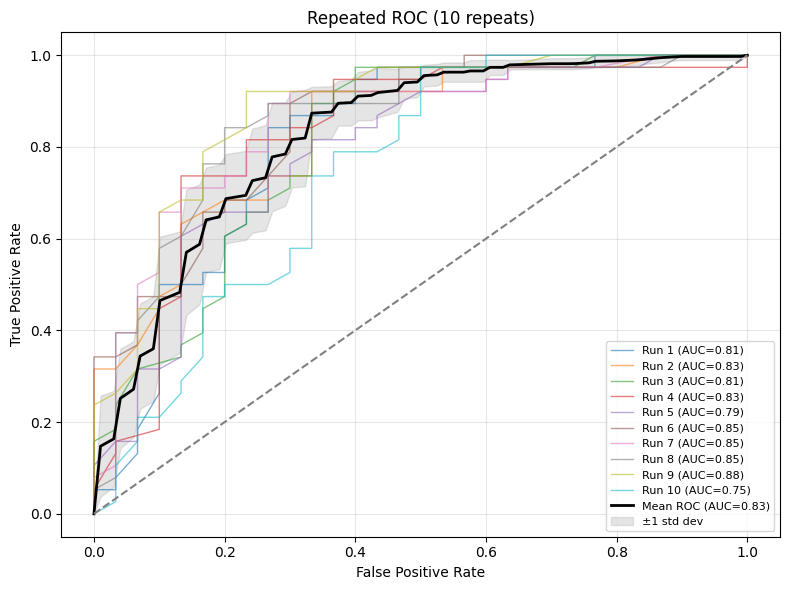

Mean AUC over 10 runs: 0.826 ± 0.036


In [17]:
evaluate_model_stability_baseline(df_stable, n_repeats=10)